In [3]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np
import random
import csv

In [8]:
sim = rebound.Simulation()

# sun
sim.add(m=0.9999999999950272, x=-0.008669035216216899, y=0.0031140563797133693, z=0.00017700903203290386, vx=-0.00017842972567085554, vy=-0.0004942109647718484, vz=8.170411607613112e-06)
# jupiter
sim.add(m=0.0009547919099366768, x=4.717393707823112, y=-1.58629315260585, z=-0.0989587433278056, vx=0.13456873359546767, vy=0.4363713717691052, vz=-0.004821057409397645)
# mars
sim.add(m=3.2271560828978514e-07, x=-0.5195763051075928, y=-1.4079912951728626, z=-0.016864026009610615, vx=0.7953007114278168, vy=-0.2075756016137399, vz=-0.023844826829689417)
sim.move_to_com()


sim.integrator = "WHfast"
sim.dt = 0.1
simtime = 100


starting_a_list = []
late_as_list = []
final_a_list = []

starting_e_list = []
final_e_list = []


rings = 200
as_per_ring = 20

for i in range (rings):

    clear_output(wait=True)
    print(i/rings)

    for j in range (as_per_ring):
    
        # create astroid
        mass = 1e-29
        radius = 2.452+(0.0005*i)
        
        # res on 2.502

        # verdelen over ring met vers. ecc
        omega =(2*np.pi)/as_per_ring*j
        ecc = 0.2*random.random()
        

        # add astroid
        sim.add(m=mass,a=radius,omega=omega, e=ecc)
        starting_a_list.append(radius)
        starting_e_list.append(ecc)

        sim.steps(int(simtime*(1/sim.dt)))
        # for years in np.arange(simtime*(1/sim.dt)):

        #     sim.steps()

        #     if years > 0.98*(simtime*(1/sim.dt)):
        #         late_as_list.append(sim.particles[2].a)

        
        final_a_list.append(sim.particles[2].a)
        final_e_list.append(sim.particles[2].e)
        

        # with open('opslag2.csv', 'a') as f:
            
        #     # using csv.writer method from CSV package
        #     write = csv.writer(f)
        #     write.writerow([radius, sim.particles[2].a, ecc, sim.particles[2].e, rings*as_per_ring, simtime, omega, sim.particles[2].omega])

        sim.remove(2)
        #write.writerows([final_a_list])

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')


ParticleNotFound: Particle was not found in the simulation.

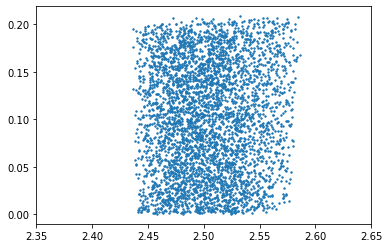

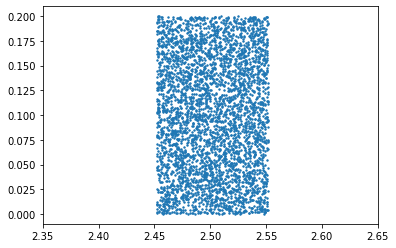

In [5]:
plt.scatter(final_a_list, final_e_list, s=2)
plt.xlim(2.35, 2.65)
#plt.ylim(-0.05, 0.3)
#plt.savefig('10001_4000_1_scattertotal')
plt.figure()
plt.scatter(starting_a_list, starting_e_list, s=2)
plt.xlim(2.35, 2.65)

plt.show()